In [1]:
#Librerías
import numpy as np
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
import random
from IPython.display import clear_output
import time
import gymLake as gymlocal
import matplotlib.pyplot as plt

In [2]:
# --Creación de Ambiente--
#env = gym.make("FrozenLake-v0")
random_map = generate_random_map(size=4, p=0.8)
env = gymlocal.FrozenLakeEnv(desc=random_map)
env.render()


SHFF
FFFF
FHFF
HFFG


In [3]:
# --Q-Table--
action_size = env.action_space.n
state_size = env.observation_space.n
qtable = np.zeros((state_size, action_size))
print(qtable)
print("action_size: ", action_size)
print("state_size: ", state_size)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
action_size:  4
state_size:  16


In [4]:
# --Hiperparámetros--
#Episodios totales
total_episodes = 1000		
#Máximo de pasos en el episodio	
max_steps = 99	
#Factor de aprendizaje	
learning_rate = 0.8 
#Factor de penalización
gamma = 0.5 		

#Parámetros de exploración
epsilon = 0.1			
max_epsilon = 1.0 			
min_epsilon = 0.01	
#Cuánto irá disminuyendo el epsilon	
decay_rate = 0.001	




In [16]:
# --Q-LEARNING--
rewards = [] # Lista de recompensad
y=[]
yy=[]
for episode in range(total_episodes):
    # Resetear ambiente
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0 # Recompensa total de episodio

    for step in range(max_steps):
        exp_exp_tradeoff = random.uniform(0,1)
        if exp_exp_tradeoff > epsilon:
            # Explotación
            action = np.argmax(qtable[state, :])
        else:
            # Exploración
            action = env.action_space.sample()

        
        # Devolver estado y recompensa
        new_state, reward, done, info = env.step(action)

        # Actualizar Q-table
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

        total_rewards += reward

        #Mover nuevo estado
        state = new_state
        if episode % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {episode}")
            print(f'Recompensa del paso: {reward}')
            #time.sleep(0.1)
            #clear_output(wait=True)
            env.render()
            
            time.sleep(0.2)
        
        if(reward > 0):
            y.append(1)
        else:
            y.append(0)
        
        # Si termina el episodio
        if done:
            break
    
    if episode % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {episode}")
            print(f'Recompensa del paso: {reward}')
            time.sleep(2)
    episode += 1

    
    yy.append(step)

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

print("Score over time: " + str(sum(rewards)/total_episodes))
print(qtable)
    


Episode: 900
Recompensa del paso: 0.0
Score over time: 0.295
[[0.015625 0.03125  0.       0.015625]
 [0.       0.       0.       0.      ]
 [0.       0.125    0.125    0.0625  ]
 [0.0625   0.25     0.125    0.125   ]
 [0.03125  0.015625 0.0625   0.015625]
 [0.03125  0.       0.125    0.      ]
 [0.0625   0.25     0.25     0.0625  ]
 [0.125    0.5      0.25     0.125   ]
 [0.015625 0.       0.       0.03125 ]
 [0.       0.       0.       0.      ]
 [0.       0.5      0.5      0.125   ]
 [0.25     1.       0.5      0.25    ]
 [0.       0.       0.       0.      ]
 [0.       0.25     0.5      0.      ]
 [0.25     0.5      1.       0.25    ]
 [0.       0.       0.       0.      ]]


In [17]:
    rewards_per_thousand_episodes = np.split(np.array(rewards),total_episodes/100)
    count = 100

    print("******** Promedio cada 1000 episodios ********")
    for r in rewards_per_thousand_episodes:
        print(count, ": ", str(sum(r/100)))
        count += 100
  

******** Promedio cada 1000 episodios ********
100 :  0.05
200 :  0.11999999999999998
300 :  0.09
400 :  0.12999999999999998
500 :  0.2800000000000001
600 :  0.26000000000000006
700 :  0.4300000000000002
800 :  0.5000000000000002
900 :  0.4400000000000002
1000 :  0.6500000000000004


Aciertos por repeticion


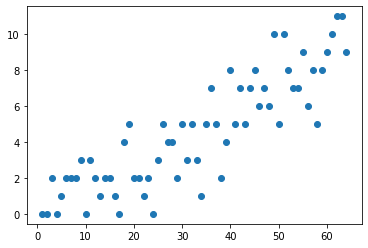

Movimientos por repeticion
x:  1000  y:  1000


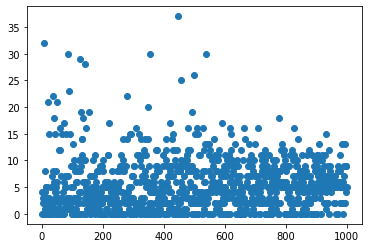

Training finished.



In [18]:
#Grafica-----------------------------------------------------------------------------------------------------------

cont = 1
lenthx = 0
porcentage = 0
porcentagey = []
for i in y:
    porcentage += i
    if(cont%100 == 0):
        porcentagey.append(porcentage)
        porcentage = 0
        cont=0
        lenthx +=1

    cont+=1

print("Aciertos por repeticion")
x = list(range(1, total_episodes+1))
porcentagex = list(range(1, lenthx+1))
#print('x: ', len(porcentagex), ' y: ', len(porcentagey))
fig, ax = plt.subplots()
#ax.scatter(x, y)
ax.scatter(porcentagex, porcentagey)
plt.show()
print("Movimientos por repeticion")
print('x: ', len(x), ' y: ', len(yy))

fig, ax = plt.subplots()
ax.scatter(x, yy)
plt.show()
print("Training finished.\n")

#------------------------------------------------------------------------------------------------------------

env.close()

In [8]:
# Test
casos_favorable = 0
cont = 0

for juego in range(1):
    recompensas_total = 0
    state = env.reset()

    while True:
        clear_output(wait = True)
        print(f'Episode {juego+1}')

        env.render()
        action = np.argmax(qtable[state])
        state, reward, done, info = env.step(action)
        recompensas_total += reward
        cont += 1
        print(f'Recompensa del paso: {cont}')
        print(f'Recompensa del paso: {reward}')
        print(f'Recompensa final: {recompensas_total}')
        
        time.sleep(0.3)
        
        if done:
            print('Juego terminado')
            if recompensas_total > 0 :
                casos_favorable += 1
            time.sleep(2)
            break

print("Porcentaje de éxito:", (casos_favorable/5)*100, "%")

env.reset()

for episode in range(1):
    state = env.reset()
    step = 0
    done = False
    print("**********************************************************")
    print("EPISODE ", episode)
    print(qtable)
    for step in range(max_steps):
        env.render()

        action = np.argmax(qtable[state, :])

        new_state, reward, done, info = env.step(action)
        print('reward: ', reward)
        #clear_output(wait=True)
        #env.render()
        
        #time.sleep(0.1)
        if done:
            break

        state = new_state
    




Episode 1
  (Right)
SFFF
FFFF
HFFF
FFFG
Recompensa del paso: 6
Recompensa del paso: 1.0
Recompensa final: 1.0
Juego terminado
Porcentaje de éxito: 20.0 %
**********************************************************
EPISODE  0
[[0.015625 0.03125  0.03125  0.015625]
 [0.015625 0.0625   0.0625   0.03125 ]
 [0.03125  0.125    0.125    0.0625  ]
 [0.0625   0.25     0.125    0.125   ]
 [0.03125  0.       0.0625   0.015625]
 [0.03125  0.125    0.125    0.03125 ]
 [0.0625   0.25     0.25     0.0625  ]
 [0.125    0.5      0.25     0.125   ]
 [0.       0.       0.       0.      ]
 [0.       0.25     0.25     0.0625  ]
 [0.125    0.5      0.5      0.125   ]
 [0.25     1.       0.5      0.25    ]
 [0.125    0.125    0.25     0.      ]
 [0.125    0.25     0.5      0.125   ]
 [0.25     0.5      1.       0.25    ]
 [0.       0.       0.       0.      ]]

SFFF
FFFF
HFFF
FFFG
reward:  0.0
  (Down)
SFFF
FFFF
HFFF
FFFG
reward:  0.0
  (Right)
SFFF
FFFF
HFFF
FFFG
reward:  0.0
  (Down)
SFFF
FFFF
HFFF
FFFG
rew